In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from IPython import display
import pandas as pd
from scipy.signal import savgol_filter

df = pd.read_csv('data.csv')
df.head()

X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

In [2]:
# weights
W = [random.random(), random.random()]
# bias
b = random.random()

print(f"Weights: {W}, Bias: {b}")

# learning rate
lr = 0.03
theta = 0.5

# sample data
# X1 = []
# X2 = []
# Y = []

# c = 50
# while c > 0:
#     r1 = random.randint(0, 100)
#     r2 = random.randint(0, 100)
#     X1.append(r1)
#     X2.append(r2)
#     if r1 > r2:
#         Y.append(0)
#     else:
#         Y.append(1)
#     c -= 1
# print(len(X1), len(X2), Y)

Weights: [0.37863893324142084, 0.3459313903287874], Bias: 0.7008062596223051


In [3]:
epoch = 0
count = 0
loss = []

while count < len(X1):
    total_err = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error = Y[i] - pred
        if error != 0:
            count = 0
            total_err += math.sqrt(error ** 2)

            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b += lr * error
        else:
            count += 1
    
    loss.append(1/4 * total_err)

    xint = (theta - b) / W[0]
    yint = (theta - b) / W[1]

    slope = -yint / xint
    
    # background coloring
    # plt.fill_betweenx(x1 = 1, x2 = 50, y = [1, 50], color = 'r')
    print(f"Epoch = {epoch} Loss = {total_err}")
    epoch += 1

ch = 1090 Loss = 8.0
Epoch = 1091 Loss = 11.0
Epoch = 1092 Loss = 11.0
Epoch = 1093 Loss = 12.0
Epoch = 1094 Loss = 8.0
Epoch = 1095 Loss = 8.0
Epoch = 1096 Loss = 8.0
Epoch = 1097 Loss = 11.0
Epoch = 1098 Loss = 9.0
Epoch = 1099 Loss = 8.0
Epoch = 1100 Loss = 5.0
Epoch = 1101 Loss = 8.0
Epoch = 1102 Loss = 10.0
Epoch = 1103 Loss = 8.0
Epoch = 1104 Loss = 10.0
Epoch = 1105 Loss = 10.0
Epoch = 1106 Loss = 9.0
Epoch = 1107 Loss = 10.0
Epoch = 1108 Loss = 8.0
Epoch = 1109 Loss = 8.0
Epoch = 1110 Loss = 8.0
Epoch = 1111 Loss = 11.0
Epoch = 1112 Loss = 9.0
Epoch = 1113 Loss = 11.0
Epoch = 1114 Loss = 12.0
Epoch = 1115 Loss = 11.0
Epoch = 1116 Loss = 12.0
Epoch = 1117 Loss = 8.0
Epoch = 1118 Loss = 8.0
Epoch = 1119 Loss = 8.0
Epoch = 1120 Loss = 11.0
Epoch = 1121 Loss = 9.0
Epoch = 1122 Loss = 11.0
Epoch = 1123 Loss = 8.0
Epoch = 1124 Loss = 11.0
Epoch = 1125 Loss = 8.0
Epoch = 1126 Loss = 11.0
Epoch = 1127 Loss = 8.0
Epoch = 1128 Loss = 11.0
Epoch = 1129 Loss = 8.0
Epoch = 1130 Loss = 8.0
E

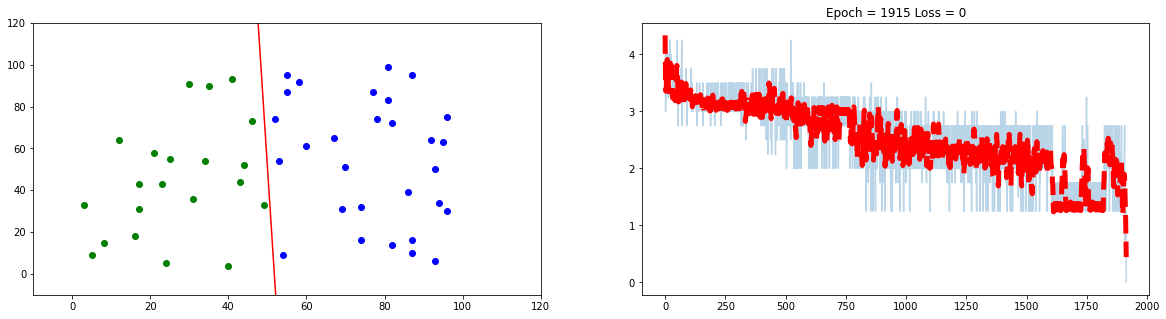

In [4]:
plt.figure(figsize = (20, 5))
display.clear_output(wait = True)
plt.subplot(1, 2, 1)

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "bo")
    else:
        plt.plot(X1[i], X2[i], "go")

plt.xlim([-10, 120])
plt.ylim([-10, 120])

x = plt.xlim()
yeq = []
for i in x:
    yeq.append(slope * i + yint)
plt.plot(x, yeq, 'r')

plt.subplot(1, 2, 2)
plt.plot(loss, alpha = 0.3)
if epoch > 10:
    avg = savgol_filter(loss, 11, 3)
    plt.plot(avg, 'r--', lw = 5)

plt.title(f"Epoch = {epoch} Loss = {total_err}")
plt.show()